<a href="https://colab.research.google.com/github/Dulmina98/save-hearts/blob/feat%2Fnipun/Blood_Forecasting_System_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
from google.colab import data_table
drive.mount('gdrive')

Mounted at gdrive


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path = '/content/gdrive/MyDrive/SDGP /DataSets/CSV File/Blood Usage Data.csv'
df = pd.read_csv(path)


In [ ]:
df.head(36)

,Month,Blood usage
0,1/1/2019,37922
1,1/2/2019,40335
2,1/3/2019,37043
3,1/4/2019,32587
4,1/5/2019,35864
5,1/6/2019,38975
6,1/7/2019,37868
7,1/8/2019,38425
8,1/9/2019,33901
9,1/10/2019,35513


In [ ]:
df.describe()

,Blood usage
count,36.000000
mean,34094.500000
std,4844.377038
min,17550.000000
25%,30977.000000
50%,34488.000000
75%,37938.750000
max,41188.000000


In [ ]:
df.tail()

,Month,Blood usage
31,1/8/2021,30803
32,1/9/2021,37380
33,1/10/2021,31810
34,1/11/2021,33670
35,1/12/2021,34082


In [ ]:
#Convert Month into Datatime
df['Month'] = pd.to_datetime(df['Month'])

In [ ]:
df.head(36)

,Month,Blood usage
0,2019-01-01,37922
1,2019-01-02,40335
2,2019-01-03,37043
3,2019-01-04,32587
4,2019-01-05,35864
5,2019-01-06,38975
6,2019-01-07,37868
7,2019-01-08,38425
8,2019-01-09,33901
9,2019-01-10,35513


In [ ]:
df.set_index('Month',inplace=True)

In [ ]:
df.head(36)

,Blood usage
Month,
2019-01-01,37922
2019-01-02,40335
2019-01-03,37043
2019-01-04,32587
2019-01-05,35864
2019-01-06,38975
2019-01-07,37868
2019-01-08,38425
2019-01-09,33901


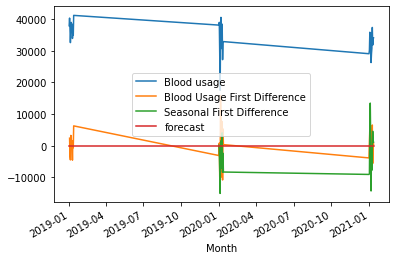

In [ ]:
df.plot()

In [ ]:
### Testing for Stationarity 

from statsmodels.tsa.stattools import adfuller


In [ ]:
test_result = adfuller(df['Blood usage'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df['Blood usage'])

ADF Test Statistic : -4.555963148390696
p-value : 0.00015558912181247428
#Lags Used : 0
Number of Observations Used : 35
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


**Differencing**

In [ ]:
df['Blood Usage First Difference'] =  df['Blood usage'] - df['Blood usage'].shift(1)

In [ ]:
df['Blood usage'].shift(1)

Month
2019-01-01        NaN
2019-01-02    37922.0
2019-01-03    40335.0
2019-01-04    37043.0
2019-01-05    32587.0
2019-01-06    35864.0
2019-01-07    38975.0
2019-01-08    37868.0
2019-01-09    38425.0
2019-01-10    33901.0
2019-01-11    35513.0
2019-01-12    34894.0
2020-01-01    41188.0
2020-01-02    38122.0
2020-01-03    38987.0
2020-01-04    29335.0
2020-01-05    17550.0
2020-01-06    33403.0
2020-01-07    40557.0
2020-01-08    30730.0
2020-01-09    38512.0
2020-01-10    37989.0
2020-01-11    27203.0
2020-01-12    32536.0
2021-01-01    32909.0
2021-01-02    29083.0
2021-01-03    30200.0
2021-01-04    35865.0
2021-01-05    31035.0
2021-01-06    35692.0
2021-01-07    26291.0
2021-01-08    29143.0
2021-01-09    30803.0
2021-01-10    37380.0
2021-01-11    31810.0
2021-01-12    33670.0
Name: Blood usage, dtype: float64

In [ ]:
df['Seasonal First Difference']=df['Blood usage']-df['Blood usage'].shift(12)

In [ ]:
df.head(36)

,Blood usage,Blood Usage First Difference,Seasonal First Difference,forecast
Month,,,,
2019-01-01,37922,NaN,NaN,0.0
2019-01-02,40335,2413.0,NaN,0.0
2019-01-03,37043,-3292.0,NaN,0.0
2019-01-04,32587,-4456.0,NaN,0.0
2019-01-05,35864,3277.0,NaN,0.0
2019-01-06,38975,3111.0,NaN,0.0
2019-01-07,37868,-1107.0,NaN,0.0
2019-01-08,38425,557.0,NaN,0.0
2019-01-09,33901,-4524.0,NaN,0.0


In [ ]:
##Again test dicky fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : 1.2900306696739465
p-value : 0.996552529497539
#Lags Used : 9
Number of Observations Used : 14
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


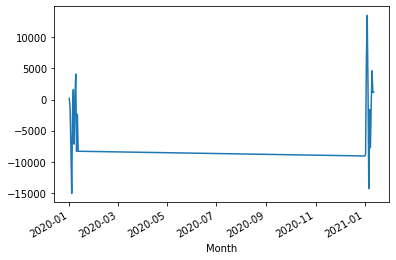

In [ ]:
df['Seasonal First Difference'].plot()

**Auto Regressive Model**

In [ ]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 129499 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Processing triggers for man-db (2.9.1-1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 KB 9.6 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31648 sha256=029c3ee5887f4135201f46b7c288adeaf25d06339f1373075b2e4a54060179ed
  Stored in directory: /root/.cache/pip/wheels/e2/96/fb/b17d6b9adb7c223428b4c77d9e8bc29f40a51d625389b73461
Successfully built libarchive


In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 77.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 5.6 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp38-cp38-linux_x86_64.whl size=11127980 sha256=efa192398b78d8249851685e5c9f47bb411dd2ab3a897fd8994671de23efc256
  Stored in directory: /root/.cache/pip/wheels/7c/ff/6f/09e4aa53f4e67d6498ef1d33dd4ea9c8c165817b9ddcc31d28
Successfully built cartopy


In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

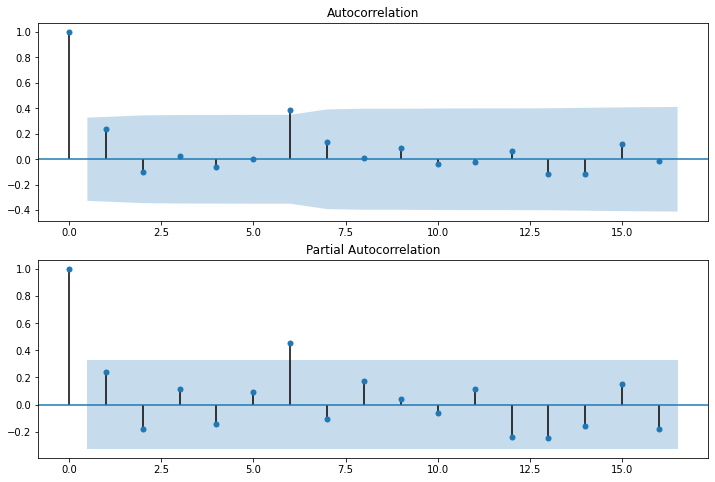

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Blood usage'],ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Blood usage'],ax=ax2)

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
model=ARIMA(df['Blood usage'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Blood usage   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -351.274
Date:                Wed, 01 Feb 2023   AIC                            708.548
Time:                        05:07:13   BIC                            713.214
Sample:                             0   HQIC                           710.158
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5278      0.112      4.731      0.000       0.309       0.746
ma.L1         -0.9996      0.276     -3.625      0.000      -1.540      -0.459
sigma2      2.831e+07   9.72e-09   2.91e+15      0.000    2.83e+07    2.83e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 2.73
Prob(Q):                              0.58   Prob(JB):                         0.25
Heteroskedasticity (H):               0.57   Skew:                            -0.68
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.8e+31. Standard errors may be unstable.
"""

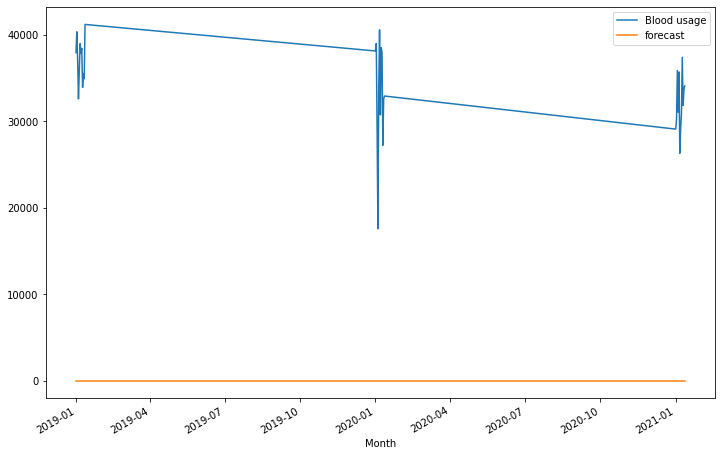

In [ ]:
df['forecast']=model_fit.predict(dynamic=True)
df[['Blood usage','forecast']].plot(figsize=(12,8))

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Blood usage'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


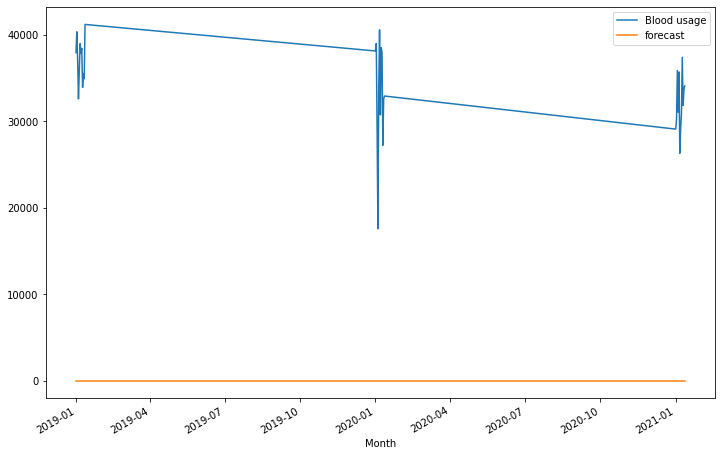

In [ ]:
df['forecast']=results.predict(dynamic=True)
df[['Blood usage','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[ DateOffset(months=x)for x in range(0,24)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.tail(12)

,Blood usage,Blood Usage First Difference,Seasonal First Difference,forecast
<DateOffset: months=12>,NaN,NaN,NaN,NaN
<DateOffset: months=13>,NaN,NaN,NaN,NaN
<DateOffset: months=14>,NaN,NaN,NaN,NaN
<DateOffset: months=15>,NaN,NaN,NaN,NaN
<DateOffset: months=16>,NaN,NaN,NaN,NaN
<DateOffset: months=17>,NaN,NaN,NaN,NaN
<DateOffset: months=18>,NaN,NaN,NaN,NaN
<DateOffset: months=19>,NaN,NaN,NaN,NaN
<DateOffset: months=20>,NaN,NaN,NaN,NaN
<DateOffset: months=21>,NaN,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df])

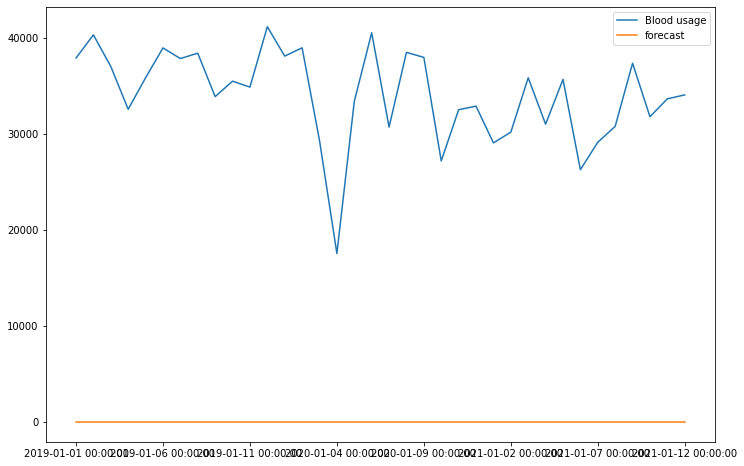

In [ ]:
future_df['forecast'] = results.predict( dynamic= True)  
future_df[['Blood usage', 'forecast']].plot(figsize=(12, 8)) 

In [ ]:
!pip install colabcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 KB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.0/424.0 KB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.0/347.0 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.9/274.9 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 